In [1]:
%load_ext autoreload
%autoreload 2
import brian2.numpy_ as np
import brian2.only as bb
from brian2 import ms, second, Hz, mV, pA, nS, pF
from matplotlib import pyplot as plt
from tqdm import tqdm
import assemblyseq.assemblyseq as asq

from assemblyseq import plotter
import assemblyseq.calc_spikes as cs


faster_run = True

if faster_run:
    bb.set_device('cpp_standalone', directory='PETH_standalone', build_on_run=False)

In [3]:
bb.start_scope()
if faster_run:
    bb.get_device().reinit()
    bb.get_device().activate(build_on_run=False, directory='PETH_standalone')

nn = asq.Nets(Ne=20000, Ni=5000, cp_ee=.01, cp_ie=.01, cp_ei=0.01, cp_ii=.01,
              n_ass=10, s_ass=500, pr=.15, pf=.03, symmetric_sequence=True, p_rev=.03,
              g_ee=0.1 * nS, g_ie=0.1 * nS, g_ei=0.4 * nS, g_ii=0.4 * nS)

initiated  Fri May 15 15:56:29 2020


In [5]:
nn.generate_ps_assemblies('gen_no_overlap')
nn.set_net_connectivity()

nn.set_spike_monitor()
nn.set_rate_monitor()

for gr_num in tqdm(range(nn.n_ass)):
    gr = nn.p_ass_index[0][gr_num]
    t_inp = (20.55 + gr_num * .1) * second
    nn.set_noisy_input(gr, t_inp, sigma=0 * ms)

nn.set_syn_input(nn.p_ass_index[0][0], np.arange(46, 51,1))
nn.balance(10 * second, 5.)
nn.balance(10 * second, 5.)
nn.balance(20 * second, .1)
nn.balance(5 * second, .01)
nn.run_sim(22*second)
# nn.Pe.I -= .0 * pA

A random sequence without overlaps is created


100%|██████████| 10/10 [00:00<00:00, 85.46it/s]

connections imprinted!  Fri May 15 15:57:00 2020


balanced:  0.698671817779541
balanced:  0.31691431999206543
balanced:  0.32041501998901367
balanced:  0.32076287269592285
run:  0.31064701080322266


In [6]:
%%time
if faster_run:
    bb.device.build(directory='PETH_standalone', compile=True, run=True, debug=False)

CPU times: user 487 ms, sys: 353 ms, total: 840 ms
Wall time: 4min 7s


(0, 1000)

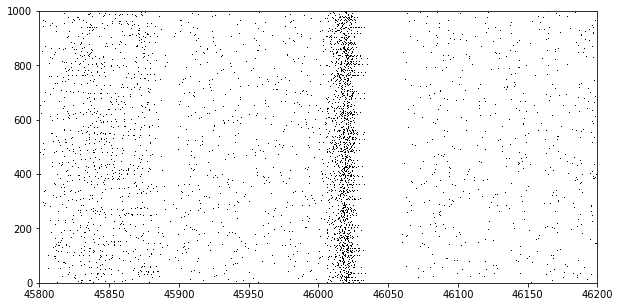

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(nn.mon_spike_e.t/ms, nn.mon_spike_e.i, ',k')
plt.xlim([45800, 46200])
plt.ylim([0, 1000])

<Figure size 720x360 with 0 Axes>

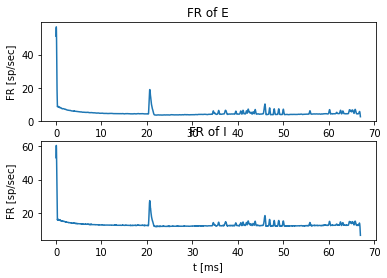

In [16]:
plt.figure(figsize=(10, 5))
plotter.plot_pop_fr(nn)

In [12]:
spikes = cs.get_spike_times_ps(nn, n_ps=0, frac=0.02)

si, st = zip(*spikes)

(49500, 50500)

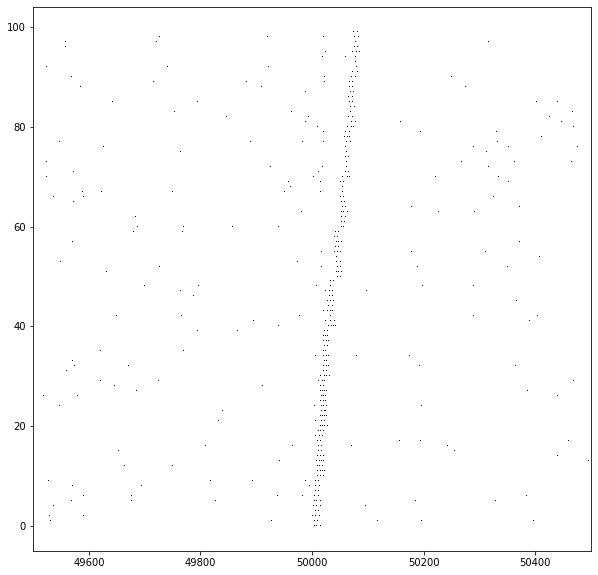

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(st/ms, si, ',k')
plt.xlim([49500, 50500])

In [65]:
set_syn_input(nn, nn.p_ass_index[0][0], 23. * second)

In [59]:
np.array(23.*second)

array(23.)